In [3]:
import pandas as pd

url = "airfoil_self_noise.dat"
cols = [
    "Frequency (Hz)",
    "Angle of attack (deg)",
    "Chord length (m)",
    "Free-stream velocity (m/s)",
    "Suction side displacement thickness (m)",
    "Sound pressure level (dB)"
]

df = pd.read_csv(url, sep='\t', header=None, names=cols)
df.head()


,Frequency (Hz),Angle of attack (deg),Chord length (m),Free-stream velocity (m/s),Suction side displacement thickness (m),Sound pressure level (dB)
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Frequency (Hz)                           1503 non-null   int64  
 1   Angle of attack (deg)                    1503 non-null   float64
 2   Chord length (m)                         1503 non-null   float64
 3   Free-stream velocity (m/s)               1503 non-null   float64
 4   Suction side displacement thickness (m)  1503 non-null   float64
 5   Sound pressure level (dB)                1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


<Axes: xlabel='Angle of attack (deg)', ylabel='Sound pressure level (dB)'>

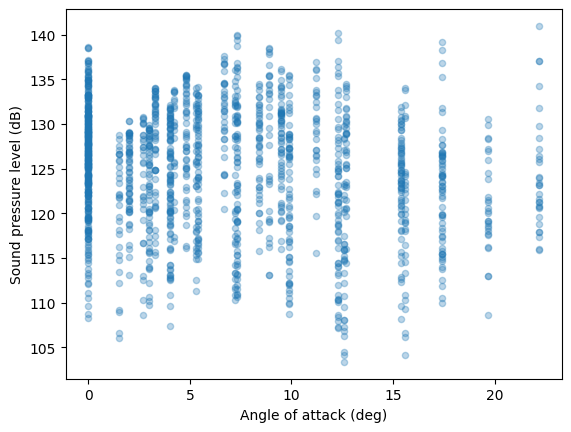

In [4]:
df.describe()
df.info()
df.corr()
df.plot(kind='scatter', x='Angle of attack (deg)', y='Sound pressure level (dB)', alpha=0.3)

In [5]:
X = df.drop(columns=["Sound pressure level (dB)"])
y = df["Sound pressure level (dB)"]

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test_scaled)
import numpy as np

print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))



R2 Score: 0.5582979754897284
RMSE: 4.704109194974887


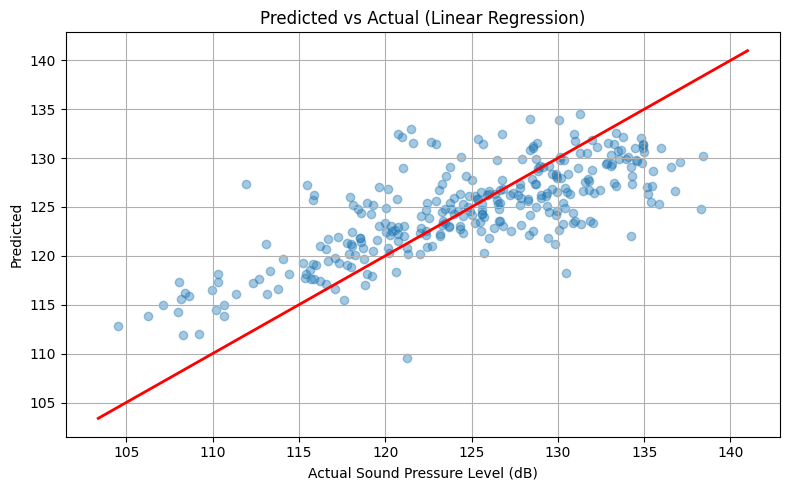

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)
plt.xlabel("Actual Sound Pressure Level (dB)")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual (Linear Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_ridge = ridge.predict(X_test_scaled)

print("Ridge R2:", r2_score(y_test, y_ridge))
print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, y_ridge)))


Ridge R2: 0.5581371308792573
Ridge RMSE: 4.704965611405402


In [13]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  # Note: no scaling needed
y_rf = rf.predict(X_test)

print("RF R2:", r2_score(y_test, y_rf))
print("RF RMSE:", np.sqrt(mean_squared_error(y_test, y_rf)))


RF R2: 0.9345545578196172
RF RMSE: 1.8107246031409456


In [14]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
y_xgb = xgb.predict(X_test)

print("XGBoost R2:", r2_score(y_test, y_xgb))
print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_xgb)))


XGBoost R2: 0.9363748480443269
XGBoost RMSE: 1.785365407039571


In [15]:
models = {
    "Linear": y_pred,
    "Ridge": y_ridge,
    "Random Forest": y_rf,
    "XGBoost": y_xgb
}

for name, y_hat in models.items():
    print(f"{name} → R2: {r2_score(y_test, y_hat):.4f}, RMSE: {np.sqrt(mean_squared_error(y_test, y_hat)):.2f}")


Linear → R2: 0.5583, RMSE: 4.70
Ridge → R2: 0.5581, RMSE: 4.70
Random Forest → R2: 0.9346, RMSE: 1.81
XGBoost → R2: 0.9364, RMSE: 1.79


In [18]:
import os

# Create folder if it doesn't exist
os.makedirs("Images", exist_ok=True)


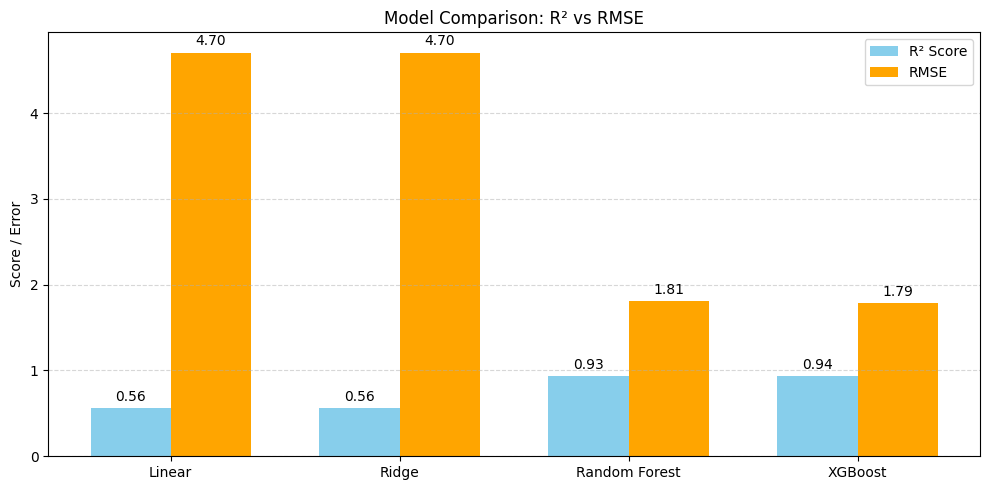

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Store results
model_names = ["Linear", "Ridge", "Random Forest", "XGBoost"]
r2_scores = [
    r2_score(y_test, y_pred),
    r2_score(y_test, y_ridge),
    r2_score(y_test, y_rf),
    r2_score(y_test, y_xgb)
]

rmses = [
    np.sqrt(mean_squared_error(y_test, y_pred)),
    np.sqrt(mean_squared_error(y_test, y_ridge)),
    np.sqrt(mean_squared_error(y_test, y_rf)),
    np.sqrt(mean_squared_error(y_test, y_xgb))
]

x = np.arange(len(model_names))
width = 0.35

# Create side-by-side bars
fig, ax1 = plt.subplots(figsize=(10, 5))
bars1 = ax1.bar(x - width/2, r2_scores, width, label='R² Score', color='skyblue')
bars2 = ax1.bar(x + width/2, rmses, width, label='RMSE', color='orange')

# Labels and titles
ax1.set_ylabel('Score / Error')
ax1.set_title('Model Comparison: R² vs RMSE')
ax1.set_xticks(x)
ax1.set_xticklabels(model_names)
ax1.legend()

# Add value labels on bars
for bar in bars1 + bars2:
    height = bar.get_height()
    ax1.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 pts vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.savefig("Images/model_comparison.png", dpi=300)
plt.show()


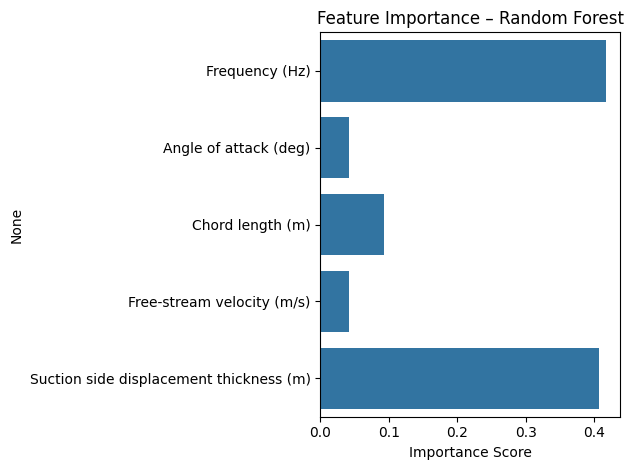

In [20]:
# Random Forest
import seaborn as sns

feature_names = X.columns

importances_rf = rf.feature_importances_
sns.barplot(x=importances_rf, y=feature_names)
plt.title("Feature Importance – Random Forest")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.savefig("Images/rf_feature_importance.png", dpi=300)
plt.show()


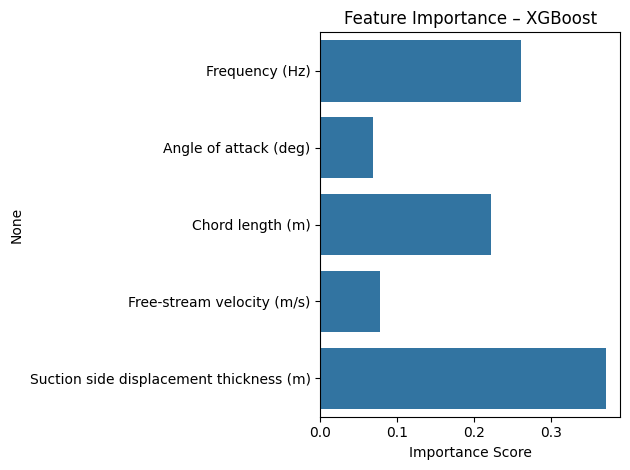

In [21]:
# XGBoost
importances_xgb = xgb.feature_importances_
sns.barplot(x=importances_xgb, y=feature_names)
plt.title("Feature Importance – XGBoost")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.savefig("Images/xgb_feature_importance.png", dpi=300)
plt.show()
